# Машинное обучение, ФЭН ВШЭ

__Дата выдачи: 26.11.2017__
__Дедлайн: 15.12.2017 23:59__

# Практическое задание 4


### О задании

Практическое задание 4 посвящено ансамблям, bias-variance decomposition, деревьям и нейронным сетям. Обучение нейронных сетей займет какое-то время, поэтому не оставляйте эту часть на последний день!

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW4_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW4_IvanovII.ipynb*). Далее отправьте этот файл на *ml.econom.hse@gmail.com* с темой *Практика {номер задания} - номер группы по данному курсу - Фамилия Имя* 

### I. Разложение ошибки на смещение и разброс
#### Теоретическое вступление
На занятиях мы разбирали примеры аналитического вычисления смещения и разброса нескольких алгоритмов обучения. Для большинства моделей данных и алгоритмов обучения аналитически рассчитать математические ожидания в формулах не удастся. Однако мат. ожидания можно оценивать приближенно. Чтобы оценить математическое ожидание $\mathbb{E}_{\bar x} f(\bar x)$ функции от многомерной случайной величины $\bar x = (x_1, \dots, x_d)$, $\bar x \sim p(\bar x)$, можно сгенерировать выборку из распределения $p(\bar x)$ и усреднить значение функции на элементах этой выборки:
$$\mathbb{E}_{\bar x} f(x) = \int f(\bar x) p(\bar x) d \bar x \approx \frac 1 m \sum_{i=1}^m f(\bar x_i), \, \bar x_i \sim p(\bar x), i = 1, \dots, m.$$

Для оценки многомерных интегралов ($d > 1$) объекты лучше генерировать, следуя специальным схемам, чтобы адекватно оценивать значение интеграла в областях высокой плотности. Мы не будем так усложнять задачу, а просто будем генерировать $\bar x_i$ независимо.

In [1]:
import numpy as np

Например, оценим $\mathbb{E}_x x^2,$ $x \sim \mathcal{N}(\mu=5, \sigma=3)$ (из теории вероятностей мы знаем, что
$\mathbb{E}_x x^2 = \sigma^2 + \mu^2 = 34$):

In [2]:
x = np.random.normal(loc=5, scale=3, size=1000)
(x**2).mean()

34.759379259326266

Или посчитаем многомерный интеграл $\mathbb{E}_{\bar x} \bar x^T \bar x = \mathbb{E}_{\bar x} \sum_{i=1}^d x_i^2$, $\bar x \sim \mathcal{N}(\bar \mu=(1, \dots, 1), \Sigma=I)$ при $d = 10$ (аналитический ответ 20):

In [3]:
d = 10
X = np.random.multivariate_normal(np.ones(10), np.eye(10), size=1000)
(X**2).sum(axis=1).mean()

20.188624472031798

Чтобы оценить интеграл по выборке, можно сгенерировать несколько выборок, вычислить на них значение функции и усреднить. Например, для интеграла $\mathbb{E}_X [\mu(X)(x)]$ генерируются выборки $X_1, \dots, X_m$, на каждой из них обучается алгоритм $\mu$ и делается предсказание для объекта $x$.

#### Практическая часть
#####  Построение "среднего" алгоритма $\mathbb{E}_X [\mu(X)]$
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм $\mathbb{E}_X [\mu(X)]$ аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

In [48]:
len(linspace)

1000

In [28]:
np.random.seed(42)

__1 (0.6 балла)__
1. Сгенерируйте выборку x из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных y как сумму f(x) и случайного шума, сгенерированного из равномерного распределения на отрезке [-1, 1] (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: f(x) и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
x = np.random.exponential(size=sample_size)
y = f(x) + np.random.uniform(-1, 1, size=sample_size) 

In [57]:
s_tree = DecisionTreeRegressor()
s_tree.fit(x.reshape(-1, 1), y)
pred = s_tree.predict(linspace.reshape(-1, 1))

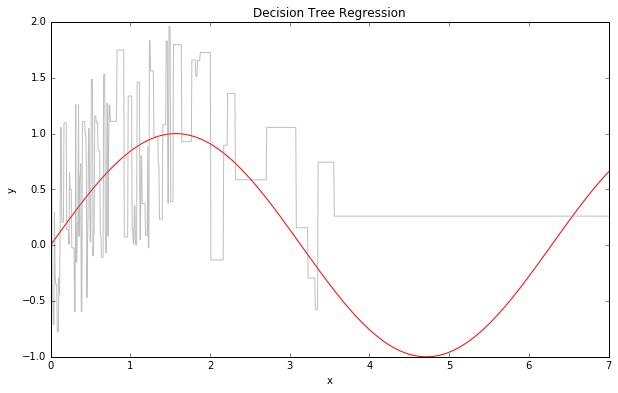

In [109]:
plt.figure(figsize=(10,6))
plt.plot(linspace, f(linspace), color="red")
plt.plot(linspace, pred, color="gray", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.show()

__2 (0.6 балла):__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

In [153]:
def plot_trees(model, samples_num=20):
    plt.figure(figsize=(10,6))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(model.__class__.__name__)
    avg = []
    plt.plot(linspace, f(linspace), color="red")
    for i in range(samples_num):
        x = np.random.exponential(size=sample_size)
        y = f(x) + np.random.uniform(-1, 1, size=sample_size)
        model.fit(x.reshape(-1, 1), y)
        pred = model.predict(linspace.reshape(-1, 1))
        plt.plot(linspace, pred, color="gray", alpha=0.5)
        avg.append(pred)
    plt.plot(linspace, np.mean(avg, axis=0), color="black")
    plt.show()

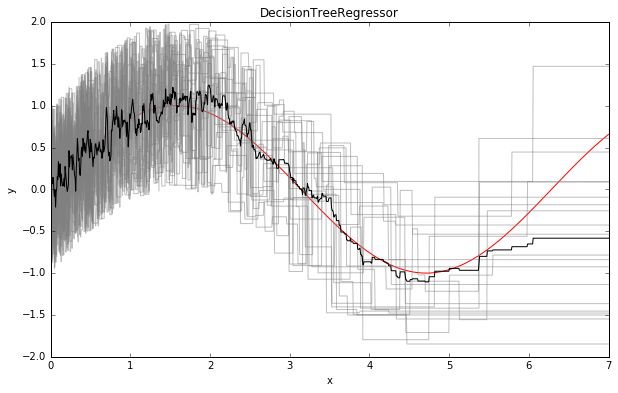

In [154]:
plot_trees(DecisionTreeRegressor())

__3 (0.2 балла):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

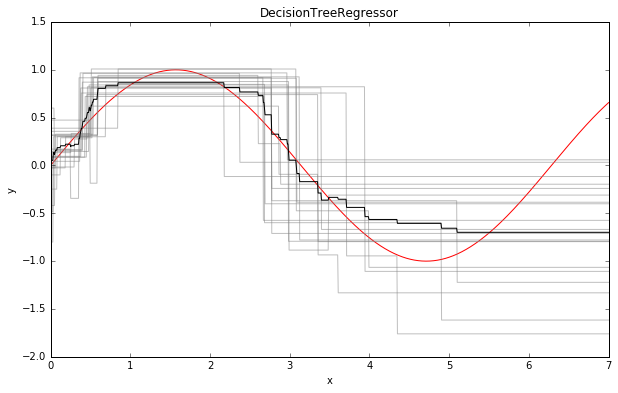

In [155]:
plot_trees(DecisionTreeRegressor(max_depth=2))

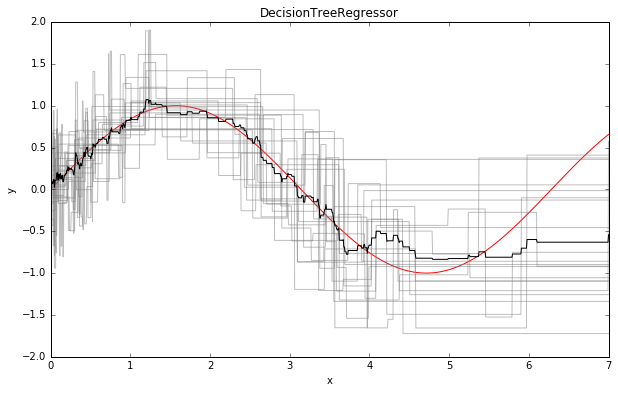

In [156]:
plot_trees(DecisionTreeRegressor(max_depth=4))

__4 (0.6 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

1. Смещение отдельно взятых деревьев высокое, но усреднение результата сильно снижает разброс
2. Чем больше глубина дерева, тем меньше смещение, то есть в случае max_depth=4 смещением стремится к 0.

Без ограничения на глубину модель слишком сильно ориентируется на шумы, в результате чего истинная зависимости плохо аппроксимируется, а глубины 2 оказывается недостаточно для хорошей аппрокимации.

__5 (1 балл)__
Проделайте тот же эксперимент с линейной регрессией и SVM с rbf ядром и параматрами $\gamma = 1$, $\gamma = 100$. Какие выводы можно сделать?

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

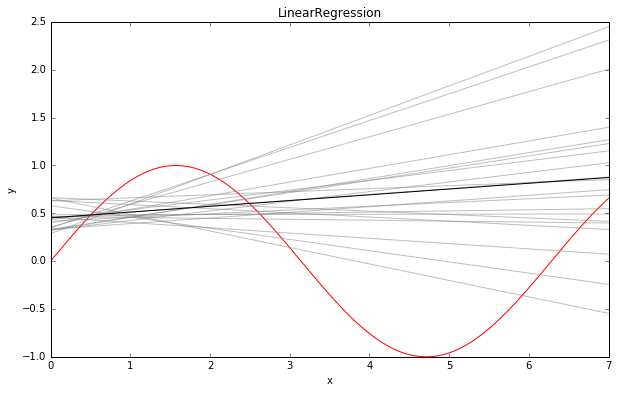

In [138]:
plot_trees(LinearRegression())

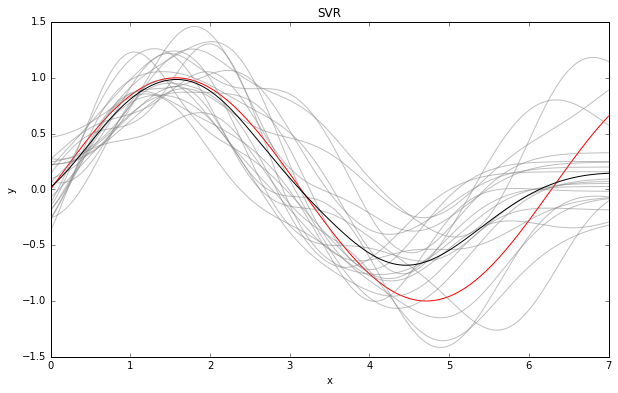

In [139]:
plot_trees(SVR(kernel='rbf', gamma=1))

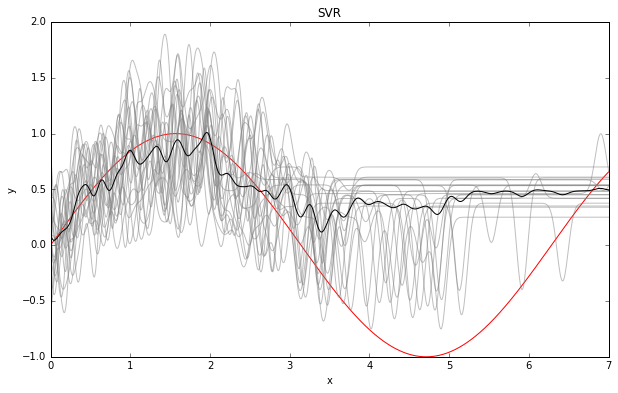

In [140]:
plot_trees(SVR(kernel='rbf', gamma=100))

Линейная регрессия, очевидно, не может удовлетворительно приблизить синусоиду. 

SVR c gamma=1, довольно хорошо аппроксимирует истинную зависимость

Высокие значения гамма приводят к более изогнутой разделяющей поверхности, модель может улавливать сложные данные, но склонна к переобучению. Что и происходит на втором графике - модель подстраивается под данные, то есть по сути под шумы и не улавливает истинной зависимости, тогда как модель с низкой гамма плохо подстраивается под данные, игнорирует шумы, что позволяет ей лучше улавливать истинную зависимость. 

### II. Решающие деревья

__5 (1 балл)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-rac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc - это класс 0, good, vgood - класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend - класс 0, very_recom, priority, spec_prior - класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTreeClassifier, считающий все признаки вещественными
* DecisionTreeClassfier, считающий все признаки категориальными
* DecisionTreeClassifier, c корректным разбиением на категориальные и вещественные признаки.

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.

### Вещественные

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [135]:
mush_orig = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                   header=None)
tic_orig = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
                  header=None)
cars_orig = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',header=None)
nurs_orig = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',header=None)

In [144]:
mush = mush_orig.copy()
tic = tic_orig.copy()
cars = cars_orig.copy()
nurs = nurs_orig.copy()

mush = mush.apply(LabelEncoder().fit_transform)
tic = tic.apply(LabelEncoder().fit_transform)
cars.iloc[:,0:6] = cars.iloc[:,0:6].apply(LabelEncoder().fit_transform)
nurs.iloc[:,0:8] = nurs.iloc[:,0:8].apply(LabelEncoder().fit_transform)

In [145]:
cars[6] = np.where((cars[6] == 'acc') | (cars[6] == 'unacc'),0,1)
nurs[8] = np.where((nurs[8]=='recommend') | (nurs[8]=='not_recom'),0,1)

In [146]:
model = DecisionTreeClassifier()
print("mushrooms", 
np.mean(cross_val_score(model, mush.iloc[:,1:], mush[0],cv=5, scoring=make_scorer(accuracy_score))))

mushrooms 0.925645150727


In [147]:
print('tic-rac-toe', 
np.mean(cross_val_score(model, tic.iloc[:,:9], tic[9],cv=5, scoring=make_scorer(accuracy_score))))

tic-rac-toe 0.696521269068


In [148]:
print('cars', 
np.mean(cross_val_score(model, cars.iloc[:,:6], cars[6],cv=5, scoring=make_scorer(accuracy_score))))

cars 0.894680064525


In [149]:
print('nursery', 
np.mean(cross_val_score(model, nurs.iloc[:,:8], nurs[8],cv=5, scoring=make_scorer(accuracy_score))))

nursery 0.999691477054


### Категориальные

In [151]:
mush = mush_orig.copy()
tic = tic_orig.copy()
cars = cars_orig.copy()
nurs = nurs_orig.copy()

In [152]:
mush[0] = LabelEncoder().fit_transform(list(mush[0]))
mush_c = pd.concat([pd.get_dummies(mush.iloc[:,1:]),mush[0]],axis=1)
tic[9] = LabelEncoder().fit_transform(list(tic[9]))
tic_c = pd.concat([pd.get_dummies(tic.iloc[:,:9]),tic[9]],axis=1)
cars[6] = np.where((cars[6] == 'unacc') | (cars[6] == 'acc'),0,1)
cars_c = pd.concat([pd.get_dummies(cars.iloc[:,:6]),cars[6]],axis=1)
nurs[8] = np.where((nurs[8]=='recommend')|(nurs[8]=='not_recom'),0,1)
nurs_c = pd.concat([pd.get_dummies(nurs.iloc[:,:8]),nurs[8]],axis=1)

In [153]:
print("mushrooms",
np.mean(cross_val_score(model, mush_c.iloc[:,:-1], mush_c.iloc[:,-1], cv=5,scoring=make_scorer(accuracy_score))))

mushrooms: 0.996305873437


In [154]:
print('tic-rac-toe', 
np.mean(cross_val_score(model, tic_c.iloc[:,:-1], tic_c.iloc[:,-1], cv=5,scoring=make_scorer(accuracy_score))))

tic-rac-toe 0.787164438823


In [155]:
print('cars', 
np.mean(cross_val_score(model, cars_c.iloc[:,:-1], cars_c.iloc[:,-1], cv=5,scoring=make_scorer(accuracy_score))))

cars 0.640815297755


In [156]:
print('nursery', 
np.mean(cross_val_score(model, nurs_c.iloc[:,:-1], nurs_c.iloc[:,-1], cv=5,scoring=make_scorer(accuracy_score))))

nursery 0.999691477054


### Корректное

1. Для mushrooms 18 (ring-number) и 8 (gill-size) признаки надо использовать как вещественные.
2. Для tic все надо использовать как категориальные
3. Для cars все надо использовать как вещественные
4. Для nurs все надо использовать как вещественные

In [170]:
mush = mush_orig.copy()
tic = tic_orig.copy()
cars = cars_orig.copy()
nurs = nurs_orig.copy()

In [171]:
mush[18] = LabelEncoder().fit_transform(list(mush[18]))
mush[8] = LabelEncoder().fit_transform(list(mush[8]))
mush_d = mush.drop([0,8,18],axis=1)
mush_f =pd.concat([pd.get_dummies(mush_d),mush[8],mush[18],mush[0]],axis=1)
tic[9] = LabelEncoder().fit_transform(list(tic[9]))
tic_c = pd.concat([pd.get_dummies(tic.iloc[:,:9]),tic[9]],axis=1)
cars[6] = np.where((cars[6] == 'unacc') | (cars[6] == 'acc'),0,1)
cars.iloc[:,0:6] = cars.iloc[:,0:6].apply(LabelEncoder().fit_transform)
nurs[8] = np.where((nurs[8]=='recommend')|(nurs[8]=='not_recom'),0,1)
nurs.iloc[:,0:8] = nurs.iloc[:,0:8].apply(LabelEncoder().fit_transform)

In [172]:
print("mushrooms",
np.mean(cross_val_score(model, mush_f.iloc[:,:-1], mush_f.iloc[:,-1], cv=5, scoring=make_scorer(accuracy_score))))

mushrooms 0.943103902994


In [173]:
print('tic-rac-toe', 
np.mean(cross_val_score(model, tic_c.iloc[:,:-1], tic_c.iloc[:,-1], cv=5, scoring=make_scorer(accuracy_score))))

tic-rac-toe 0.793387565671


In [174]:
print('cars', 
np.mean(cross_val_score(model, cars.iloc[:,:-1], cars.iloc[:,-1], cv=5, scoring=make_scorer(accuracy_score))))

cars 0.894680064525


In [175]:
print('nursery', 
np.mean(cross_val_score(tree_num, nurs.iloc[:,:-1], nurs.iloc[:,-1], cv=5, scoring=make_scorer(accuracy_score))))

nursery 0.999691477054


__6 (0.5 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

Ранжирование алгоритмов разное. 

В корректном разбиении результат наилучший в совокупности, так как такое разбиение не дает ложных сигналов алгоритму (ранжирование там где его нет и тд), что позволяте алгоритму лучше выбирать разбиение

### III. Композиции деревьев
#### Сравнение композиционных методов над решающими деревьями
__7 (1 балл)__

Выполните следующие шаги:
1. Загрузите датасет [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в датафрейм. Последний столбец - целевая переменная (содержит классы).
1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * BaggingClassifier со 100 деревьями; каждое дерево обучается только по половине случайно выбранных признаков (см. параметры метода)
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом. Этот пример демонстрирует, что RandomForest - это более сложный алгоритм, чем бэггинг и бэггинг со случайными подпространствами. 

In [164]:
wine = pd.read_csv("winequality-red.csv", sep=";")

In [187]:
X = wine.loc[:, wine.columns != 'quality']
y = wine.quality

estimators = [DecisionTreeClassifier(), BaggingClassifier(n_estimators=100), BaggingClassifier(n_estimators=100,
max_features=0.5, random_state=42), RandomForestClassifier(n_estimators=100) ]

scores = []
for estimator in estimators:
    score = cross_val_score(estimator, X, y,  scoring=make_scorer(accuracy_score), cv=3)
    scores.append(np.mean(score))

In [193]:
for i, model in enumerate(estimators):
    print(model.__class__.__name__, scores[i])

DecisionTreeClassifier 0.444064580333
BaggingClassifier 0.559762877389
BaggingClassifier 0.561671939237
RandomForestClassifier 0.561667245806


Как и ожидалось, точность возрастает с каждым новым алгоритмом, RandomForestClassifier показывает лучший результат

#### Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__8 (1 балл)__

Продолжим работать с набором данных [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Разделите выборку на обучение и контроль с пропорции 7:3, предварительно перемешав объекты. Переберите значения от 100 до 5000 деревьев с шагом 100, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $100 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [194]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [210]:
model = None
scores = []
for trees in range(100, 5001, 100):
    if model is None:
        model = RandomForestClassifier(n_estimators=trees, warm_start=True,  random_state=42)
    else:
        model.set_params(n_estimators=trees)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

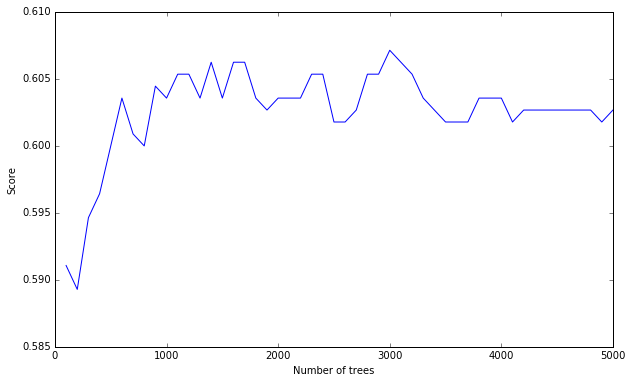

In [207]:
plt.figure(figsize=(10,6))
plt.plot(range(100, 5001, 100), scores)
plt.xlabel("Number of trees")
plt.ylabel("Score")

С ростом числа деревьев в случайном лесе, как видно, точность на тестовой выборке не ухудшается, то есть алгоритм не переобучается. Каждое дерево строится независимо, а результат усредняется по всем деревьям. 

### IV. Нейронные сети

*На обучение нейросетей может уйти больше часа, не откладывайте этот пункт на последний день*.

__9 (1 балл)__

В этом задании вам предстоит обучить нейронную сеть на датасете [MNIST](https://en.wikipedia.org/wiki/MNIST_database) с помощью пакета [keras](https://keras.io).

In [124]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Обучите нейронную сеть с двумя скрытыми слоями в каждой из которых поместите по 100 нейронов. Какого качества удается добиться на тесте?

In [119]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

In [125]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255

In [126]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [127]:
print('Building model...') 
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense((10), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Building model...


In [128]:
history = model.fit(x_train, y_train, batch_size=120, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.3296 - acc: 0.9053 - val_loss: 0.1565 - val_acc: 0.9555
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.1364 - acc: 0.9598 - val_loss: 0.1130 - val_acc: 0.9654
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.0963 - acc: 0.9710 - val_loss: 0.0963 - val_acc: 0.9695
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.0744 - acc: 0.9773 - val_loss: 0.0921 - val_acc: 0.9726
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.0582 - acc: 0.9820 - val_loss: 0.0852 - val_acc: 0.9736
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.0470 - acc: 0.9858 - val_loss: 0.0738 - val_acc: 0.9764
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.0393 - acc: 0.9880 - val_loss: 0.0908 - val_acc: 0.9718
Epoch 8/10
60000/60000 [==============================] - 4s 

In [129]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9766


__10 (2 балл)__
Добавьте сверточные и pooling слои (вы можете также убрать Dense слои), добейтесь большего качества. Для успешного выполнения задания получите accuracy больше 0.99 на тестовой выборке. 

Рекомендации: после сверточных слоев наиболее эффективно добавлять MaxPooling слои, в конце перед последним слоем поставьте Dense слои с достаточно большим количеством нейронов. Подвигайте количество слоев, learning rate, функции активации.

In [130]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [116]:
print('Building model...') 
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(210, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Building model...


In [117]:
history = model.fit(x_train, y_train, batch_size=300, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 71s - loss: 0.2769 - acc: 0.9219 - val_loss: 0.0664 - val_acc: 0.9786
Epoch 2/10
60000/60000 [==============================] - 74s - loss: 0.0644 - acc: 0.9808 - val_loss: 0.0496 - val_acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 72s - loss: 0.0474 - acc: 0.9855 - val_loss: 0.0385 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 73s - loss: 0.0362 - acc: 0.9892 - val_loss: 0.0336 - val_acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 72s - loss: 0.0292 - acc: 0.9912 - val_loss: 0.0258 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 70s - loss: 0.0225 - acc: 0.9933 - val_loss: 0.0270 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 72s - loss: 0.0193 - acc: 0.9942 - val_loss: 0.0273 - val_acc: 0.9900
Epoch 8/10
60000/60000 [==============================

In [118]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9906


__11 (1 балл)__
Добавьте 1 или 2 dropout слоя внутрь сети предыдущего шага. Удается ли добиться большего качества? Что происходит с процессом обучения? 

In [131]:
print('Building model...') 
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(210, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Building model...


In [132]:
history = model.fit(x_train, y_train, batch_size=300, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 77s - loss: 0.3707 - acc: 0.8845 - val_loss: 0.0631 - val_acc: 0.9795
Epoch 2/10
60000/60000 [==============================] - 75s - loss: 0.0941 - acc: 0.9717 - val_loss: 0.0430 - val_acc: 0.9870
Epoch 3/10
60000/60000 [==============================] - 90s - loss: 0.0703 - acc: 0.9789 - val_loss: 0.0343 - val_acc: 0.9891
Epoch 4/10
60000/60000 [==============================] - 101s - loss: 0.0544 - acc: 0.9836 - val_loss: 0.0291 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 104s - loss: 0.0501 - acc: 0.9847 - val_loss: 0.0264 - val_acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 97s - loss: 0.0436 - acc: 0.9862 - val_loss: 0.0229 - val_acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 90s - loss: 0.0396 - acc: 0.9879 - val_loss: 0.0220 - val_acc: 0.9928
Epoch 8/10
60000/60000 [============================

In [133]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9924


Очевидно, добавление Dropout существенно повышает точность модели. 

Dropout позволяет избежать переобучения нейронной сети - для при обучении сигналы части нейронов игнорируются. Делается это для того, чтобы сократить взаимозависимость нейронов в сложной сети, которая приводит к тому, что "сила" каждого отдельного нейрона снижается, тем самым возникает переобучение. Игнорируемые нейроны выбираются случайно (они не используются при обучении - прямом и обратном распространении ошибки. 

Вдохновлялся источниками:
1. https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py
2. https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py